In [35]:
import pandas as pd  
import numpy as np 
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [36]:
# Carrega o dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
data = data.rename(columns={'family_history_with_overweight': 'FHWOW'})
data = data.rename(columns={'NObeyesdad': 'Obesity'})
# Verifica dados ausentes
missing_values = data.isnull().sum()
print(missing_values.to_frame().T)

   Gender  Age  Height  Weight  FHWOW  FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  \
0       0    0       0       0      0     0     0    0     0      0     0   

   SCC  FAF  TUE  CALC  MTRANS  Obesity  
0    0    0    0     0       0        0  


In [37]:
# imprime os dados
print(data.shape)
data.head(10)

(2111, 17)


,Gender,Age,Height,Weight,FHWOW,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [38]:
# Separa as colunas categoricas e numericas
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(exclude=['object']).columns

In [39]:
# colunas categoricas
print(categorical_columns.values)

['Gender' 'FHWOW' 'FAVC' 'CAEC' 'SMOKE' 'SCC' 'CALC' 'MTRANS' 'Obesity']


In [40]:
# colunas numericas
print(numerical_columns.values)

['Age' 'Height' 'Weight' 'FCVC' 'NCP' 'CH2O' 'FAF' 'TUE']


In [41]:
# aplica o LabelEncoder nas colunas categoricas menos o target

categorical_columns = categorical_columns[categorical_columns != 'Obesity']

data[categorical_columns] = data[categorical_columns].apply(LabelEncoder().fit_transform)

data.head(10)

,Gender,Age,Height,Weight,FHWOW,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II
5,1,29.0,1.62,53.0,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,2,0,Normal_Weight
6,0,23.0,1.50,55.0,1,1,3.0,3.0,2,0,2.0,0,1.0,0.0,2,2,Normal_Weight
7,1,22.0,1.64,53.0,0,0,2.0,3.0,2,0,2.0,0,3.0,0.0,2,3,Normal_Weight
8,1,24.0,1.78,64.0,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,1,3,Normal_Weight
9,1,22.0,1.72,68.0,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,3,3,Normal_Weight


In [42]:
# Quantidade de instancias por classe target 
print(data['Obesity'].value_counts())

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [43]:
# Separa em fearures e target
X = data.drop('Obesity', axis=1)
y = data['Obesity']

from sklearn.model_selection import train_test_split

# Separa em features e target
X = data.drop('Obesity', axis=1)
y = data['Obesity']

# Separa TESTE (20%) e TREINO (80%) - que sera separado em treino e validacao dentro do cross-validation
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
modelKnn = KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights='uniform')

# Aqui separa em treino e validacao para crossval
scores = cross_val_score(modelKnn, X, y, cv=5)

print("Scores: ", scores)
print("Média dos scores:", scores.mean())

Scores:  [0.86982249 0.84319527 0.83431953 0.8694362  0.86350148]
Média dos scores: 0.85605499271329


In [45]:
# Modelo final usando toda a base de treino + validacao
modelKnn.fit(X, y)

KNeighborsClassifier(metric='euclidean')

In [46]:
# Predicao do modelo em validacao usando a base completa
predictionsKnn = modelKnn.predict(X)

print('Accuracy:', accuracy_score(y, predictionsKnn))
print('F1:', f1_score(y, predictionsKnn, average='macro'))
print('Precision:', precision_score(y, predictionsKnn, average='macro'))
print('Recall:', recall_score(y, predictionsKnn, average='macro'))


Accuracy: 0.9164691943127962
F1: 0.9110519551908908
Precision: 0.9161725374146693
Recall: 0.9135498640805545


In [47]:
# Predicao do modelo em teste
predictionsKnn = modelKnn.predict(X_test)

print('Accuracy:', accuracy_score(y_test, predictionsKnn))
print('F1:', f1_score(y_test, predictionsKnn, average='macro'))
print('Precision:', precision_score(y_test, predictionsKnn, average='macro'))
print('Recall:', recall_score(y_test, predictionsKnn, average='macro'))

Accuracy: 0.8817966903073287
F1: 0.8717610708288458
Precision: 0.881134892947882
Recall: 0.8806801440521447


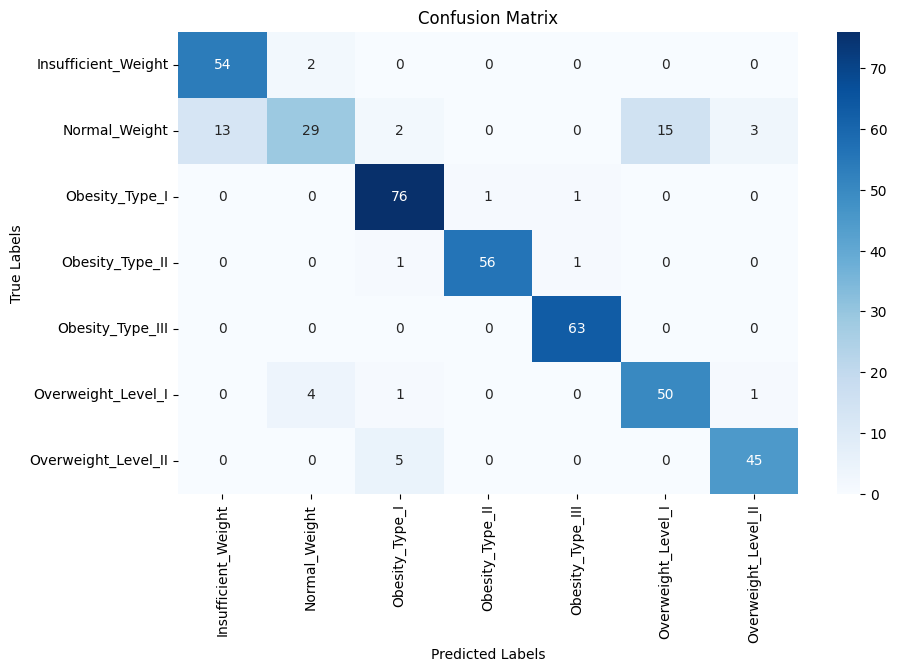

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# faz a matriz
cm = confusion_matrix(y_test, predictionsKnn)

class_labels = sorted(set(y_test))  

# plot da matriz
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()